<a href="https://colab.research.google.com/github/rubuntu/h2oai-tutorials/blob/main/introduction_to_machine_learning_with_h2o_3_automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Initial Setup

Based on https://github.com/h2oai/tutorials/blob/master/H2O-3/h2o-3-tutorials-code/Python/introduction-to-machine-learning-with-h2o-3-automl.ipynb

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install http://h2o-release.s3.amazonaws.com/h2o/rel-zipf/2/Python/h2o-3.32.1.2-py2.py3-none-any.whl

     |████████████████████████████████| 164.9MB 1.3MB/s 


In [ ]:
#Import H2O and other libaries that will be used in this tutorial 
import matplotlib as plt
import pandas as pd
%matplotlib inline
from h2o.automl import *

In [ ]:
#import os
#import h2o

#startup  = '/home/h2o/bin/aquarium_startup'
#shutdown = '/home/h2o/bin/aquarium_stop'

#if os.path.exists(startup):
#    os.system(startup)
#    local_url = 'http://localhost:54321/h2o'
#    aquarium = True
#else:
#    local_url = 'http://localhost:54321'
#    aquarium = False

In [ ]:
#h2o.init(url = local_url)
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk5z8s6hk
  JVM stdout: /tmp/tmpk5z8s6hk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk5z8s6hk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_t7604y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


## Task 2: AutoML Concepts

Please look at the document

## Task 3: Start Experiment

In [ ]:
#Import the dataset 
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/H2O-3-Tutorials/loan_level_50k.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
loan_level.head()

CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
707,200211,N,202903,33340,0,1,O,60,57,136000,60,6.25,R,N,FRM,WI,SF,53000,F199Q1000018,C,317,2,Other sellers,Other servicers,TRUE,FALSE
691,200302,N,202901,15940,0,1,O,65,25,130000,65,5.875,R,N,FRM,OH,SF,44700,F199Q1000023,P,312,2,Other sellers,Other servicers,TRUE,FALSE
730,199903,N,202902,16620,30,1,O,94,29,138000,94,7,T,N,FRM,WV,SF,25300,F199Q1000037,P,360,2,Other sellers,Other servicers,TRUE,FALSE
638,199905,N,202904,42020,nan,1,O,67,28,160000,67,7.375,T,N,FRM,CA,SF,93400,F199Q1000067,N,360,2,CROSSLAND MORTGAGE C,CHASEMTGECO,TRUE,FALSE
577,199903,N,202902,12580,12,1,O,80,53,43000,80,7.25,T,N,FRM,MD,SF,21200,F199Q1000086,N,360,1,ACCUBANC MORTGAGE CO,GMACMTGECORP,FALSE,TRUE
693,199905,N,202904,nan,nan,1,O,80,43,93000,80,7.125,R,N,FRM,SD,SF,57500,F199Q1000104,P,360,1,"NORWEST MORTGAGE, IN",WELLSFARGOHOMEMORTGA,TRUE,FALSE
739,199905,,202904,16700,nan,1,S,80,25,200000,80,6.875,R,N,FRM,SC,CO,29400,F199Q1000107,P,360,2,"NORWEST MORTGAGE, IN",WELLSFARGOHOMEMORTGA,TRUE,FALSE
695,199905,,202904,42044,0,1,O,40,6,135000,40,6.875,R,N,FRM,CA,SF,92800,F199Q1000121,C,360,2,NATIONSBANC MORTGAGE,"BAMORTGAGE,LLC",TRUE,FALSE
753,199905,N,202904,41740,0,1,O,80,17,59000,80,7,R,N,FRM,CA,CO,92000,F199Q1000122,P,360,1,NATIONSBANC MORTGAGE,"BAMORTGAGE,LLC",TRUE,FALSE
712,199905,,202904,nan,nan,1,O,80,28,126000,80,7.125,R,N,FRM,MI,SF,48800,F199Q1000123,N,360,2,Other sellers,Other servicers,TRUE,FALSE


In [ ]:
loan_level.describe()

Rows:49930
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199902.0,,202404.0,10180.0,0.0,1.0,,6.0,1.0,10000.0,6.0,5.0,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.3066000684777,200025.6742239134,,203023.3970759064,30705.258665299156,7.719609503855924,1.0281994792709799,,76.08864765261984,32.83933763635985,136369.6775485679,75.7452382382984,7.185977708792308,,,,,,55401.434122501334,NaN,,359.85083116362875,1.6294507784479122,,,,
maxs,830.0,200403.0,,203312.0,49740.0,50.0,4.0,,160.0,65.0,529000.0,100.0,10.625,,,,,,99900.0,NaN,,361.0,2.0,,,,
sigma,54.97355321804355,109.77460105158103,,110.47953133322676,11363.12482267641,12.042273590466618,0.21962330364819396,,15.062080123474091,11.16538336497283,60632.74328123587,14.867228331350553,0.5835949914330252,,,,,,29512.32285922538,NaN,,1.9974697613404884,0.48295669536262226,,,,
zeros,0,0,,0,0,31023,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,279,0,13067,0,7029,5064,0,0,2,1437,0,1,0,0,504,0,0,13,4,0,0,0,23,0,0,0,0
0,707.0,200211.0,N,202903.0,33340.0,0.0,1.0,O,60.0,57.0,136000.0,60.0,6.25,R,N,FRM,WI,SF,53000.0,F199Q1000018,C,317.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,691.0,200302.0,N,202901.0,15940.0,0.0,1.0,O,65.0,25.0,130000.0,65.0,5.875,R,N,FRM,OH,SF,44700.0,F199Q1000023,P,312.0,2.0,Other sellers,Other servicers,TRUE,FALSE
2,730.0,199903.0,N,202902.0,16620.0,30.0,1.0,O,94.0,29.0,138000.0,94.0,7.0,T,N,FRM,WV,SF,25300.0,F199Q1000037,P,360.0,2.0,Other sellers,Other servicers,TRUE,FALSE


In [ ]:
loan_level["DELINQUENT"].table()

DELINQUENT,Count
FALSE,48118
TRUE,1812


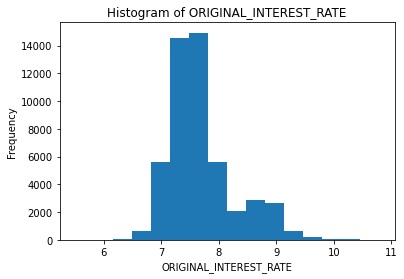

In [ ]:
loan_level["ORIGINAL_INTEREST_RATE"].hist()

In [ ]:
train, test = loan_level.split_frame([0.8], seed = 42)

In [ ]:
print("train:%d test:%d" % (train.nrows, test.nrows))

train:39984 test:9946


## Task 4: H2O AutoML Classification

In [ ]:
y = "DELINQUENT"

ignore = ["DELINQUENT", 
          "PREPAID", 
          "PREPAYMENT_PENALTY_MORTGAGE_FLAG", 
          "PRODUCT_TYPE"] 

x = list(set(train.names) - set(ignore))

In [ ]:
test["DELINQUENT"].table()

DELINQUENT,Count
FALSE,9551
TRUE,395


In [ ]:
aml = H2OAutoML(max_models = 25, max_runtime_secs_per_model = 30, seed = 42, 
                project_name = 'classification', balance_classes = True, 
                class_sampling_factors = [0.5, 1.25])

%time aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 28.5 s, sys: 1.25 s, total: 29.7 s
Wall time: 10min 50s


In [ ]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210514_223352,0.860839,0.117932,0.23514,0.30515,0.173645,0.0301527
StackedEnsemble_BestOfFamily_AutoML_20210514_223352,0.859785,0.118271,0.231592,0.318419,0.173876,0.030233
GLM_1_AutoML_20210514_223352,0.853877,0.120899,0.205956,0.336445,0.175755,0.0308898
XGBoost_3_AutoML_20210514_223352,0.850206,0.121016,0.217804,0.319812,0.175142,0.0306747
GBM_grid__1_AutoML_20210514_223352_model_3,0.846733,0.121796,0.215528,0.333045,0.175333,0.0307416
GBM_1_AutoML_20210514_223352,0.843329,0.124678,0.199057,0.333359,0.176961,0.0313153
GBM_5_AutoML_20210514_223352,0.839494,0.125391,0.197529,0.349592,0.177011,0.0313329
XGBoost_2_AutoML_20210514_223352,0.839366,0.124996,0.195061,0.324122,0.177739,0.0315911
GBM_grid__1_AutoML_20210514_223352_model_2,0.839131,0.123741,0.207958,0.324447,0.175961,0.0309624
GBM_2_AutoML_20210514_223352,0.838989,0.127064,0.190581,0.332059,0.178073,0.03171


In [ ]:
#Bonus new feature in AutoML, rel 3.28
lb2 = get_leaderboard(aml, extra_columns = 'ALL')
lb2.head(rows = lb2.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210514_223352,0.860839,0.117932,0.23514,0.30515,0.173645,0.0301527,9721,0.136661,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210514_223352,0.859785,0.118271,0.231592,0.318419,0.173876,0.030233,5917,0.062069,StackedEnsemble
GLM_1_AutoML_20210514_223352,0.853877,0.120899,0.205956,0.336445,0.175755,0.0308898,11358,0.001712,GLM
XGBoost_3_AutoML_20210514_223352,0.850206,0.121016,0.217804,0.319812,0.175142,0.0306747,3143,0.003198,XGBoost
GBM_grid__1_AutoML_20210514_223352_model_3,0.846733,0.121796,0.215528,0.333045,0.175333,0.0307416,3070,0.02192,GBM
GBM_1_AutoML_20210514_223352,0.843329,0.124678,0.199057,0.333359,0.176961,0.0313153,2216,0.013149,GBM
GBM_5_AutoML_20210514_223352,0.839494,0.125391,0.197529,0.349592,0.177011,0.0313329,3397,0.017147,GBM
XGBoost_2_AutoML_20210514_223352,0.839366,0.124996,0.195061,0.324122,0.177739,0.0315911,4462,0.003909,XGBoost
GBM_grid__1_AutoML_20210514_223352_model_2,0.839131,0.123741,0.207958,0.324447,0.175961,0.0309624,2667,0.019847,GBM
GBM_2_AutoML_20210514_223352,0.838989,0.127064,0.190581,0.332059,0.178073,0.03171,2269,0.013438,GBM


In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.coef()

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:836: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


{'DRF_1_AutoML_20210514_223352': 0.017295602449910144,
 'DeepLearning_1_AutoML_20210514_223352': 0.10516080444812693,
 'GBM_grid__1_AutoML_20210514_223352_model_3': 0.23034570067489724,
 'GLM_1_AutoML_20210514_223352': 0.29825769567136967,
 'Intercept': 0.20830119865700267,
 'XGBoost_3_AutoML_20210514_223352': 0.3131761554446857,
 'XRT_1_AutoML_20210514_223352': 0.05124765889956372}

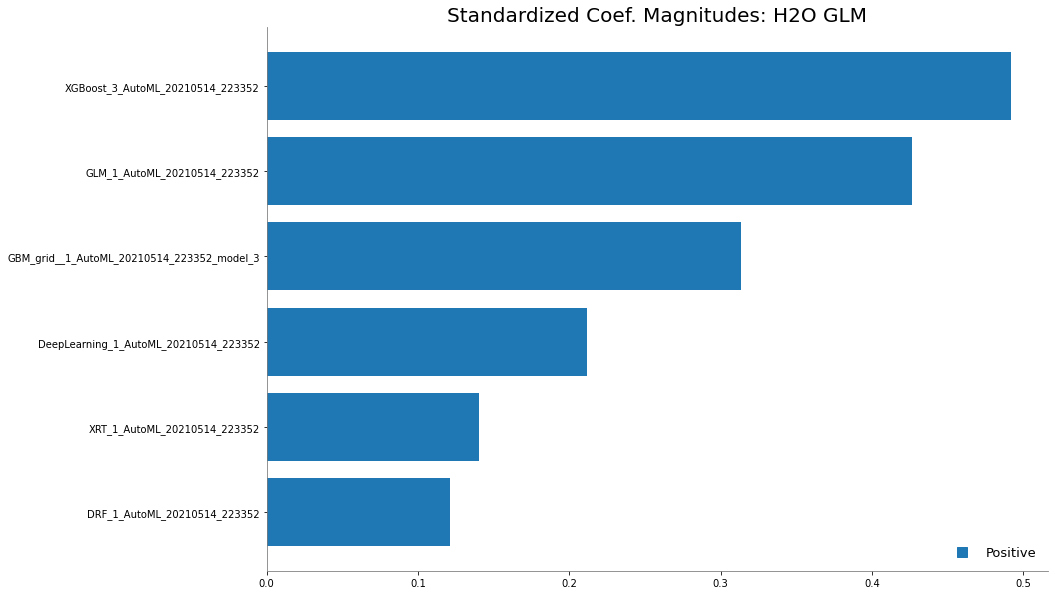

In [ ]:
metalearner.std_coef_plot()

In [ ]:
aml.leader.model_performance(test_data = test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.034234675857970964
RMSE: 0.18502614911944465
LogLoss: 0.13583444892515675
Null degrees of freedom: 9945
Residual degrees of freedom: 9931
Null deviance: 3327.7962854656025
Residual deviance: 2702.018858019218
AIC: 2732.018858019218
AUC: 0.8284226318670322
AUCPR: 0.22229794005982312
Gini: 0.6568452637340645

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2275673226762386: 


,,FALSE,TRUE,Error,Rate
0,FALSE,9333.0,218.0,0.0228,(218.0/9551.0)
1,TRUE,288.0,107.0,0.7291,(288.0/395.0)
2,Total,9621.0,325.0,0.0509,(506.0/9946.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.227567,0.297222,127.0
1,max f2,0.057316,0.380030,266.0
2,max f0point5,0.274920,0.326340,103.0
3,max accuracy,0.518064,0.960989,26.0
4,max precision,0.518064,0.589744,26.0
5,max recall,0.001286,1.000000,396.0
6,max specificity,0.829398,0.999895,0.0
7,max absolute_mcc,0.227567,0.272477,127.0
8,max min_per_class_accuracy,0.036127,0.762025,300.0
9,max mean_per_class_accuracy,0.032675,0.762628,307.0



Gains/Lift Table: Avg response rate:  3.97 %, avg score:  3.88 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010054,0.399765,10.827291,10.827291,0.430000,0.509143,0.430000,0.509143,0.108861,0.108861,982.729114,982.729114,0.102893
1,2,0.020008,0.284754,7.375885,9.110260,0.292929,0.340273,0.361809,0.425133,0.073418,0.182278,637.588544,811.026016,0.168981
2,3,0.030062,0.238077,7.050329,8.421320,0.280000,0.261454,0.334448,0.370391,0.070886,0.253165,605.032911,742.132001,0.232329
3,4,0.040016,0.198140,3.306431,7.149024,0.131313,0.216999,0.283920,0.332235,0.032911,0.286076,230.643140,614.902360,0.256236
4,5,0.050070,0.171960,4.532354,6.623588,0.180000,0.184098,0.263052,0.302489,0.045570,0.331646,353.235443,562.358802,0.293220
5,6,0.100040,0.095960,2.634501,4.631049,0.104628,0.128161,0.183920,0.215413,0.131646,0.463291,163.450067,363.104892,0.378274
6,7,0.150010,0.067914,2.381183,3.881596,0.094567,0.081135,0.154155,0.170683,0.118987,0.582278,138.118330,288.159636,0.450146
7,8,0.200080,0.050278,1.668537,3.327776,0.066265,0.058436,0.132161,0.142593,0.083544,0.665823,66.853744,232.777559,0.485004
8,9,0.300020,0.029378,1.317250,2.658050,0.052314,0.038365,0.105563,0.107874,0.131646,0.797468,31.725034,165.804968,0.518021
9,10,0.400060,0.018678,0.480819,2.113605,0.019095,0.023502,0.083941,0.086776,0.048101,0.845570,-51.918071,111.360529,0.463934


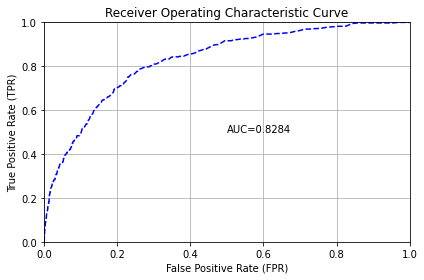

In [ ]:
%matplotlib inline
aml.leader.model_performance(test_data = test).plot()

In [ ]:
aml.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.961051,0.0389486
FALSE,0.987702,0.0122981
FALSE,0.99508,0.00491979
FALSE,0.951687,0.0483127
FALSE,0.982956,0.0170445
FALSE,0.994997,0.00500269
FALSE,0.996847,0.00315308
FALSE,0.998561,0.00143927
FALSE,0.995623,0.00437711
FALSE,0.993204,0.00679605


## Task 5: H2O AutoML Regression

In [ ]:
y_reg = "ORIGINAL_INTEREST_RATE"

ignore_reg = ["ORIGINAL_INTEREST_RATE", 
              "FIRST_PAYMENT_DATE", 
              "MATURITY_DATE", 
              "MORTGAGE_INSURANCE_PERCENTAGE", 
              "PREPAYMENT_PENALTY_MORTGAGE_FLAG", 
              "LOAN_SEQUENCE_NUMBER", 
              "PREPAID", 
              "DELINQUENT", 
              "PRODUCT_TYPE"] 

x_reg = list(set(train.names) - set(ignore_reg))

In [ ]:
print("y:", y_reg, "\nx:", x_reg)

y: ORIGINAL_INTEREST_RATE 
x: ['NUMBER_OF_BORROWERS', 'ORIGINAL_LOAN_TO_VALUE', 'PROPERTY_TYPE', 'ORIGINAL_UPB', 'CHANNEL', 'LOAN_PURPOSE', 'FIRST_TIME_HOMEBUYER_FLAG', 'OCCUPANCY_STATUS', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'SERVICER_NAME', 'SELLER_NAME', 'ORIGINAL_LOAN_TERM', 'PROPERTY_STATE', 'POSTAL_CODE', 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'METROPOLITAN_STATISTICAL_AREA', 'NUMBER_OF_UNITS', 'CREDIT_SCORE']


In [ ]:
aml = H2OAutoML(max_runtime_secs = 900, max_runtime_secs_per_model = 30, seed = 42, 
                project_name = 'regression',  stopping_metric = "RMSE", 
                sort_metric = "RMSE")

%time aml.train(x = x_reg, y = y_reg, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min, sys: 2.29 s, total: 1min 3s
Wall time: 14min 13s


In [ ]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,rmse,mean_residual_deviance,mse,mae,rmsle
GBM_2_AutoML_20210514_224956,0.431104,0.185851,0.185851,0.313055,0.0509991
GBM_3_AutoML_20210514_224956,0.431195,0.185929,0.185929,0.313097,0.0509962
GBM_4_AutoML_20210514_224956,0.432373,0.186946,0.186946,0.31395,0.0511356
GBM_1_AutoML_20210514_224956,0.432658,0.187193,0.187193,0.314815,0.051172
GBM_5_AutoML_20210514_224956,0.434751,0.189008,0.189008,0.316282,0.051412
GBM_grid__1_AutoML_20210514_224956_model_3,0.435896,0.190005,0.190005,0.315393,0.0515435
GBM_grid__1_AutoML_20210514_224956_model_2,0.436266,0.190328,0.190328,0.319204,0.0515709
XGBoost_grid__1_AutoML_20210514_224956_model_2,0.437663,0.191549,0.191549,0.319431,0.0517603
XGBoost_3_AutoML_20210514_224956,0.438092,0.191924,0.191924,0.319717,0.0518123
XGBoost_grid__1_AutoML_20210514_224956_model_3,0.438488,0.192271,0.192271,0.319786,0.0518678


In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the top _____ from Leaderboard
gbm = h2o.get_model([mid for mid in model_ids if "GBM_3" in mid][0])

In [ ]:
print("ntrees = ", gbm.params['ntrees'])
print("max depth = ", gbm.params['max_depth'])
print("learn rate = ", gbm.params['learn_rate'])
print("sample rate = ", gbm.params['sample_rate'])

ntrees =  {'default': 50, 'actual': 57, 'input': 10000}
max depth =  {'default': 5, 'actual': 8, 'input': 8}
learn rate =  {'default': 0.1, 'actual': 0.1, 'input': 0.1}
sample rate =  {'default': 1.0, 'actual': 0.8, 'input': 0.8}


In [ ]:
gbm.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'balance_classes': {'actual': False, 'default': False, 'input': False},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'Enum',
  'default': 'AUTO',
  'input': 'AUTO'},
 'check_constant_response': {'actual': True, 'default': True, 'input': True},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'class_sampling_factors': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_change_per_level': {'actual': 1.0,
  'default': 1.0,
  'input': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'custom_distribution_func': {'actual': None, 'default': None, 'input': None},
 'custom_metric_func'

In [ ]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20210514_224956


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,57.0,57.0,134229.0,8.0,8.0,8.0,76.0,194.0,147.52632




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.14351593942756652
RMSE: 0.3788349765103092
MAE: 0.27375376214977265
RMSLE: 0.04490229156371216
Mean Residual Deviance: 0.14351593942756652

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1859291815156833
RMSE: 0.43119506202608965
MAE: 0.3130970945748643
RMSLE: 0.05099618674247512
Mean Residual Deviance: 0.1859291815156833

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.3130971,0.0014502355,0.31364968,0.3153873,0.31181452,0.3123145,0.31231937
1,mean_residual_deviance,0.1859291,0.0030992774,0.1880803,0.1902072,0.18448956,0.18413104,0.1827374
2,mse,0.1859291,0.0030992774,0.1880803,0.1902072,0.18448956,0.18413104,0.1827374
3,r2,0.4549728,0.0075220484,0.45033154,0.4464763,0.4533178,0.4655661,0.4591723
4,residual_deviance,0.1859291,0.0030992774,0.1880803,0.1902072,0.18448956,0.18413104,0.1827374
5,rmse,0.43118304,0.0035880893,0.43368226,0.4361275,0.42952248,0.42910492,0.42747796
6,rmsle,0.05099509,3.7273197E-4,0.051177256,0.051565662,0.050765492,0.05079446,0.050672576



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-05-14 22:52:44,17.691 sec,0.0,0.584073,0.441749,0.341141
1,,2021-05-14 22:52:45,17.996 sec,5.0,0.510037,0.384655,0.260137
2,,2021-05-14 22:52:45,18.291 sec,10.0,0.470208,0.353379,0.221095
3,,2021-05-14 22:52:45,18.585 sec,15.0,0.439065,0.326883,0.192778
4,,2021-05-14 22:52:46,18.890 sec,20.0,0.422712,0.312335,0.178685
5,,2021-05-14 22:52:46,19.192 sec,25.0,0.411086,0.301918,0.168992
6,,2021-05-14 22:52:46,19.485 sec,30.0,0.401901,0.293367,0.161524
7,,2021-05-14 22:52:47,19.981 sec,35.0,0.395719,0.287910,0.156593
8,,2021-05-14 22:52:47,20.278 sec,40.0,0.390466,0.283452,0.152463
9,,2021-05-14 22:52:47,20.558 sec,45.0,0.385972,0.279630,0.148974



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,SELLER_NAME,16313.226562,1.000000,0.436583
1,SERVICER_NAME,4911.038574,0.301046,0.131432
2,PROPERTY_STATE,4720.433105,0.289362,0.126331
3,LOAN_PURPOSE,2071.910645,0.127008,0.055450
4,ORIGINAL_UPB,2010.926392,0.123270,0.053817
5,OCCUPANCY_STATUS,1715.718262,0.105173,0.045917
6,CREDIT_SCORE,1355.919434,0.083118,0.036288
7,ORIGINAL_LOAN_TO_VALUE,1222.750854,0.074955,0.032724
8,ORIGINAL_DEBT_TO_INCOME_RATIO,727.270020,0.044582,0.019464
9,ORIGINAL_COMBINED_LOAN_TO_VALUE,545.889404,0.033463,0.014609


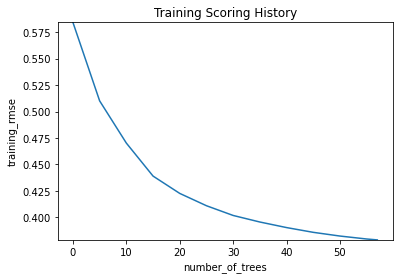

In [ ]:
gbm.plot()

In [ ]:
gbm.model_performance(test_data = test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.1841337475202411
RMSE: 0.4291080837274463
MAE: 0.3132060934423781
RMSLE: 0.05079714341814705
Mean Residual Deviance: 0.1841337475202411


In [ ]:
aml.leader.model_performance(test_data = test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.18479878271260888
RMSE: 0.4298822893683908
MAE: 0.3130563833418824
RMSLE: 0.05088511834510968
Mean Residual Deviance: 0.18479878271260888


In [ ]:
pred = gbm.predict(test)
pred = pred.cbind(test['ORIGINAL_INTEREST_RATE'])
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,ORIGINAL_INTEREST_RATE
6.90648,7.5
7.00887,6.625
7.23106,7
7.23262,7.15
7.15959,7
7.36226,7.125
6.87353,8.75
6.90346,6.5
7.06122,7
7.19299,7.25


## Task 6: H2O AutoML Classification in Flow

Please refer to the Document

## Task 7: H2O AutoML Regression in Flow

Please refer to the Document

In [ ]:
h2o.cluster().shutdown()

H2O session _sid_a1bb closed.


## Task 8: Challenge

Try to further tune the GBM that we found when we did the regression use-case in our Jupyter Notebook

### Shutdown Cluster

In [ ]:
#h2o.cluster().shutdown()